<a href="https://colab.research.google.com/github/jacksonsin/machine_learning/blob/main/Heart_Disease_AutoML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References**

https://www.youtube.com/watch?v=sm5xeKal72I

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/master/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Pre-Processing**

In [2]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Mean values of Heart Attack Patients
data[data['target']== 1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [5]:
data.shape, data.dropna().shape

((303, 14), (303, 14))

In [6]:
print(str(round((data.shape[0] - data.dropna().shape[0]) / data.shape[0],2))+'% loss')

0.0% loss


In [7]:
data.dropna(inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Install Package
!pip install dabl

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
import dabl
df = dabl.clean(data, verbose=1)

Detected feature types:
continuous      4
dirty_float     0
low_card_int    1
categorical     9
date            0
free_string     0
useless         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


**Exploratory Data Analysis**

Target looks like classification
Linear Discriminant Analysis training set score: 0.729


[[<Figure size 1080x1080 with 30 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

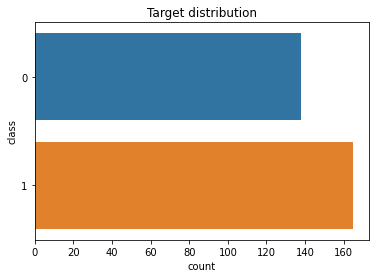

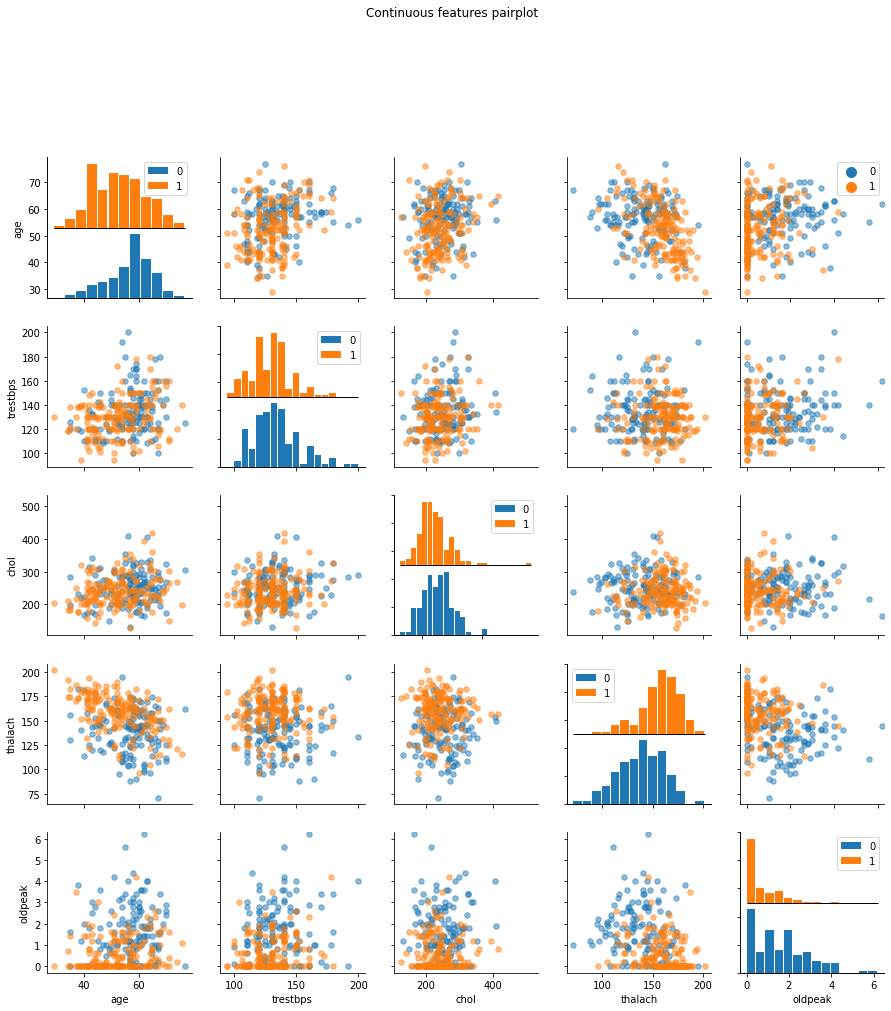

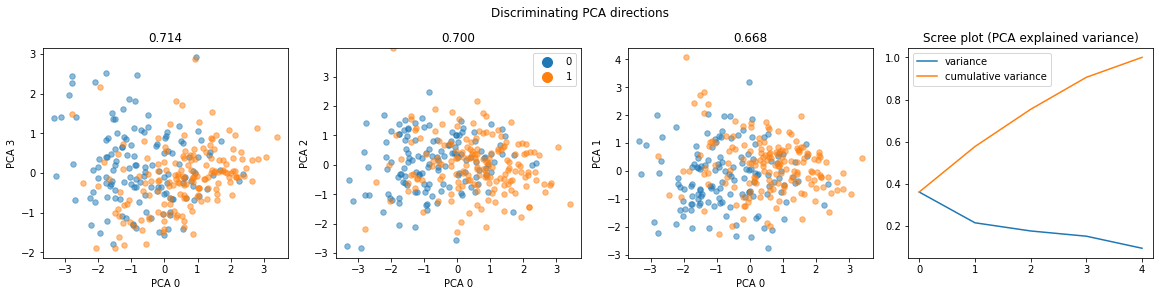

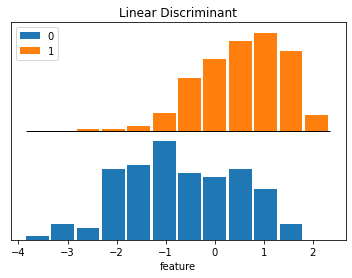

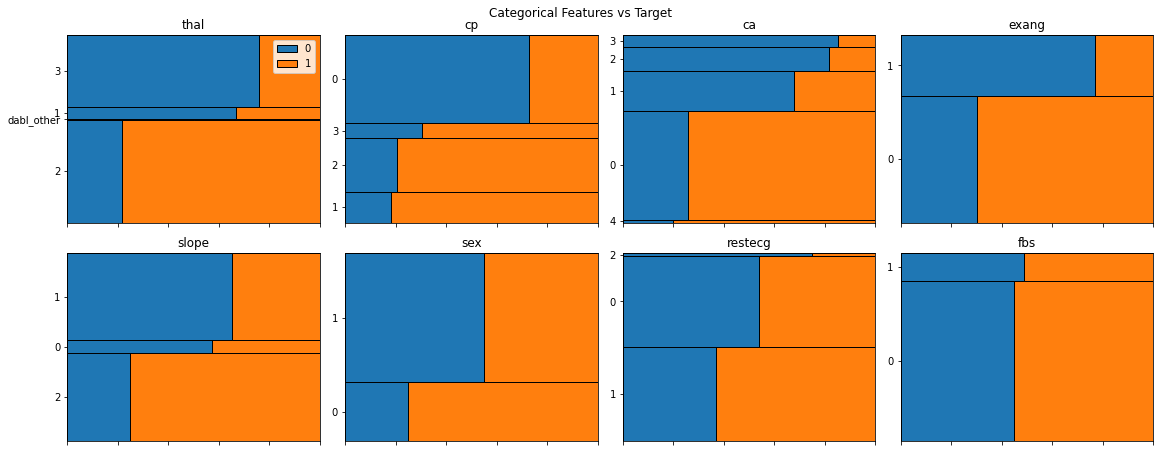

In [11]:
dabl.plot(df, target_col="target")

**Initial Model Building**

In [12]:
from sklearn.model_selection import train_test_split
# Assign to Predictors
X = df.drop('target', axis=1)
# Assign to Target
y = df.target

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model Building
heart_disease_classifier = dabl.SimpleClassifier(random_state=42).fit(X_train, y_train)

Running DummyClassifier()
accuracy: 0.550 average_precision: 0.450 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.355
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.550 average_precision: 0.450 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.355

Running GaussianNB()
accuracy: 0.450 average_precision: 0.484 roc_auc: 0.678 recall_macro: 0.490 f1_macro: 0.373
Running MultinomialNB()
accuracy: 0.818 average_precision: 0.910 roc_auc: 0.910 recall_macro: 0.817 f1_macro: 0.816
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.818 average_precision: 0.910 roc_auc: 0.910 recall_macro: 0.817 f1_macro: 0.816

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.731 average_precision: 0.636 roc_auc: 0.727 recall_macro: 0.727 f1_macro: 0.727
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.744 average_precision: 0.679 roc_auc: 0.739 recall_macro: 0.739 f1_macro: 0.738
Running DecisionTreeClassifier(class_weig

**Export Model**

In [15]:
import joblib
joblib.dump(heart_disease_classifier,'heart_disease_predictor.ml')

['heart_disease_predictor.ml']

In [16]:
import pickle
pickle.dump(heart_disease_classifier, open('heart_disease_predictor.pkl','wb'))

**Import Model**

In [17]:
import joblib
model = joblib.load('heart_disease_predictor.ml')

In [18]:
import warnings
warnings.filterwarnings('ignore') 
model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])[0]

'0'